In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install qrcode
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pillow
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install lxml

In [2]:
# for QR generator
import qrcode

# for dynamic file path finder
import tkinter as tk
from tkinter import filedialog

import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML
import base64

In [5]:
# open the data and load in python
root = tk.Tk()
root.withdraw()

endung = 'keine'

print('Öffne die gesuchte Datei!\nAchte darauf, dass diese entweder als xlsx oder csv vorliegt!\nBechte bitte auch, dass die ausgewählte Datei eine Spalte mit dem Namen: Buchungsnummer besitzt.\nDie Einträge aus dieser Spalte werden zu den Dateinamen.\n\n')


while endung == 'keine':
    
    file_path = filedialog.askopenfilename()
    if not file_path:
        sys.exit('Programm wurde vom Benutzer beendet')
    if file_path[-4:] == 'xlsx':
        raw_data = pd.read_excel(file_path)
        endung = 'xlsx'        
    elif file_path[-3:] == 'csv':
        raw_data = pd.read_csv(file_path, head)
        endung = 'csv'        
    else:
        endung = 'keine'
        print('Bitte formatiere deine Datei in xlsx oder csv Datei um!\n\nDeine Datei muss außerdem eine Spalte mit Namen: Buchungsnummer besitzen.\n\n\n')
    

Öffne die gesuchte Datei!
Achte darauf, dass diese entweder als xlsx oder csv vorliegt!
Bechte bitte auch, dass die ausgewählte Datei eine Spalte mit dem Namen: Buchungsnummer besitzt.
Die Einträge aus dieser Spalte werden zu den Dateinamen.




In [6]:
if 'Buchungsnummer' in raw_data.columns:    
    buchungsnummer = raw_data['Buchungsnummer']
else:
    sys.exit('Die Spalte mit Namen: Buchungsnummer existiert nicht!')

        
print('Wo willst du die Dateien speichern?\nGib hier bitte den Pfad an!\n')

file_path = filedialog.askdirectory()
if not file_path:
   sys.exit('Programm wurde vom Benutzer beendet')

Wo willst du die Dateien speichern?
Gib hier bitte den Pfad an!



In [7]:
def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'


In [8]:
new_df = raw_data
new_df['Bildname'] = ''
new_df['QR-Code'] = ''

In [18]:
for i, nr in enumerate(buchungsnummer):
    img = qrcode.make(nr, border = 2, box_size = 10, error_correction=qrcode.constants.ERROR_CORRECT_Q)
    new_df['Bildname'] = nr + ".png"
    new_df['path'] = file_path + '/' + nr + ".png"
    img.save(file_path + '/'+ nr + ".png")

new_df['QR-Code'] = new_df.path.map(lambda f: get_thumbnail(f))
new_df = new_df.drop(['path'], axis=1)

In [19]:
new_df.head()

,Buchungsnummer,dateiname,Bildname,QR-Code
0,181-3709C-11A,181-3709C-11A.png,181-3734F-120.png,<PIL.PngImagePlugin.PngImageFile image mode=1 ...
1,181-370A0-116,181-370A0-116.png,181-3734F-120.png,<PIL.PngImagePlugin.PngImageFile image mode=1 ...
2,181-370A4-118,181-370A4-118.png,181-3734F-120.png,<PIL.PngImagePlugin.PngImageFile image mode=1 ...
3,181-370A8-118,181-370A8-118.png,181-3734F-120.png,<PIL.PngImagePlugin.PngImageFile image mode=1 ...
4,181-370AC-11A,181-370AC-11A.png,181-3734F-120.png,<PIL.PngImagePlugin.PngImageFile image mode=1 ...


,Buchungsnummer,dateiname,Bildname,QR-Code
0,181-3709C-11A,181-3709C-11A.png,181-3734F-120.png,
1,181-370A0-116,181-370A0-116.png,181-3734F-120.png,
2,181-370A4-118,181-370A4-118.png,181-3734F-120.png,
3,181-370A8-118,181-370A8-118.png,181-3734F-120.png,
4,181-370AC-11A,181-370AC-11A.png,181-3734F-120.png,
5,181-370B0-118,181-370B0-118.png,181-3734F-120.png,
6,181-370B4-11A,181-370B4-11A.png,181-3734F-120.png,
7,181-370B8-11A,181-370B8-11A.png,181-3734F-120.png,
8,181-370BC-11C,181-370BC-11C.png,181-3734F-120.png,
9,181-370C0-116,181-370C0-116.png,181-3734F-120.png,

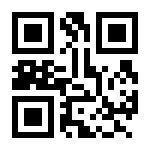
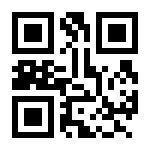
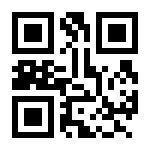
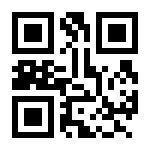
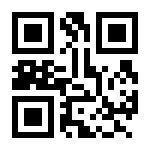
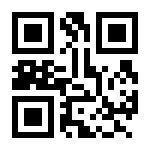
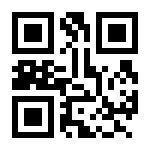
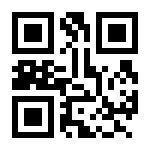
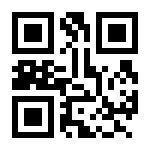
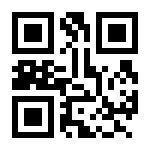
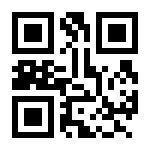
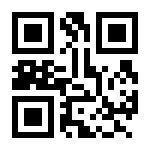
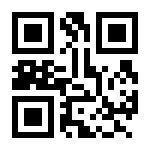
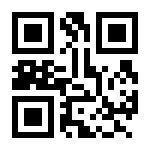
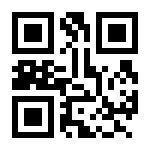
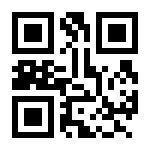
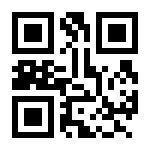
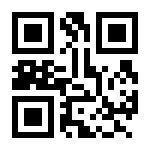
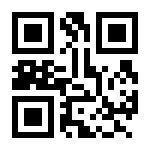
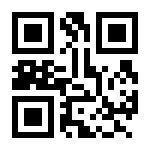
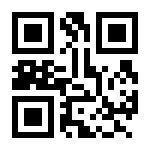
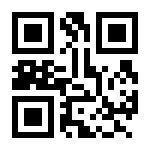
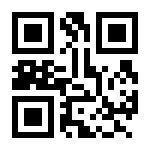
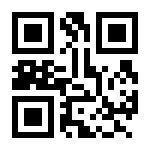
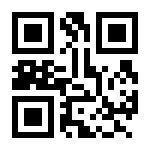
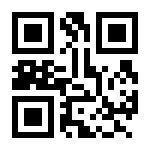
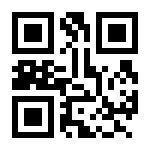
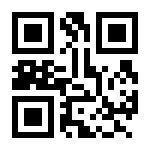
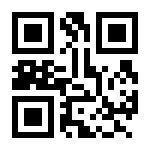
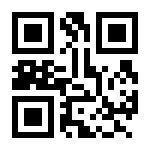
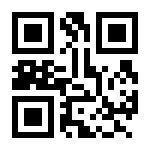
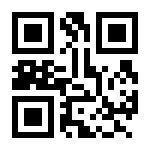
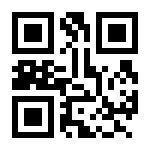
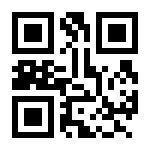
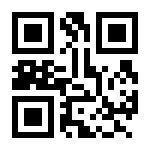
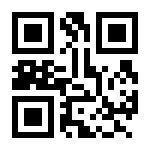
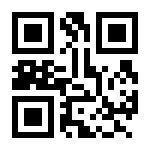
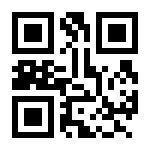
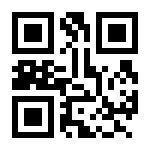
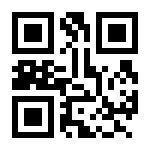
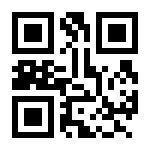
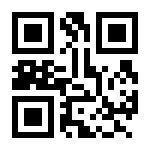
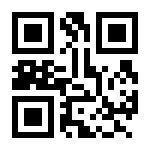
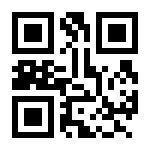
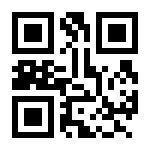
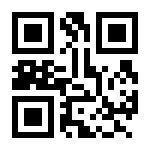
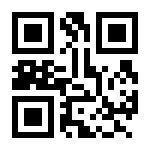
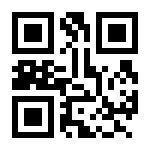
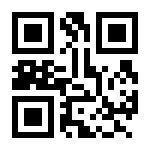
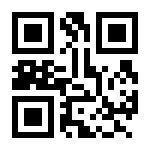
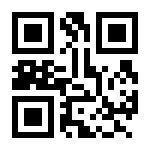
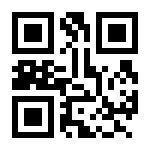
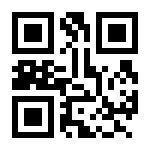
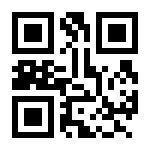
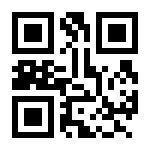
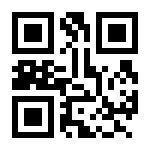
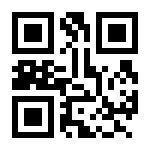
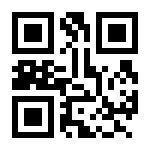
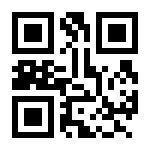
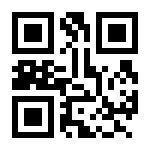
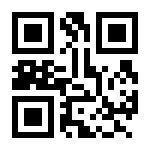
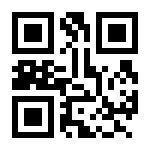
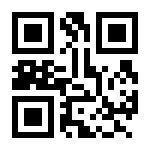
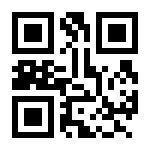
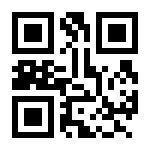
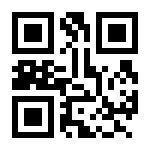
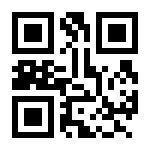
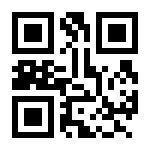
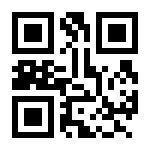
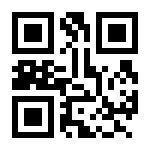
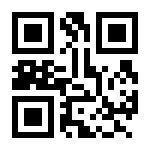
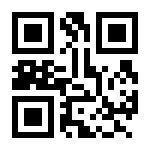
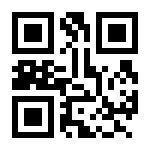
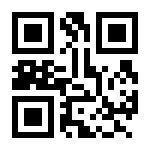
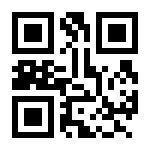
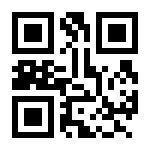
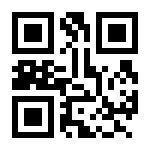
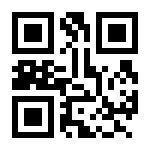
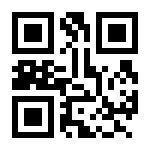
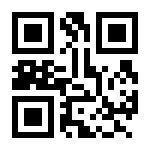
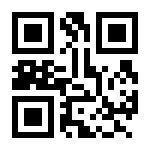
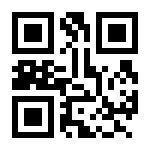
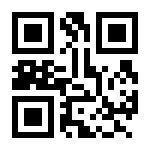
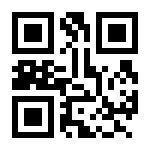
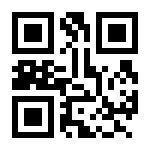
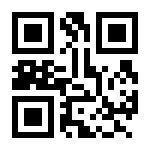
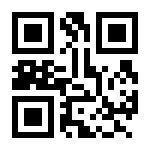
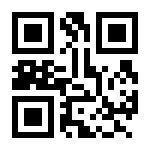
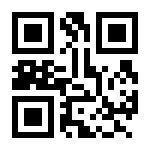
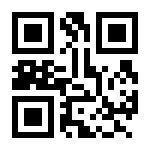
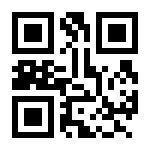
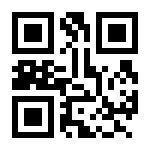
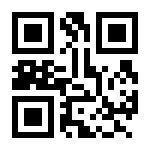
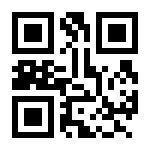
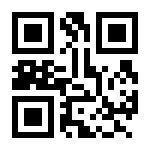
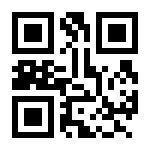
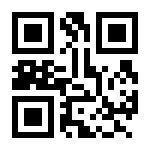
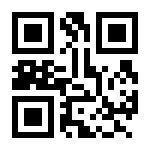
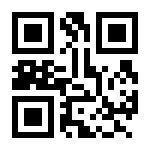
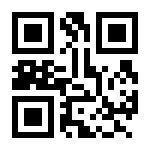
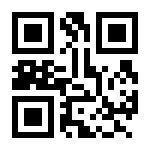
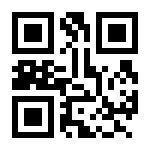
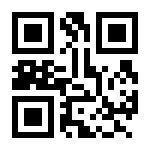
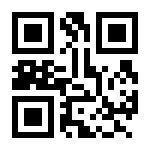
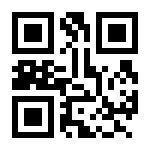
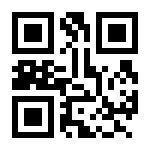
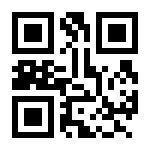
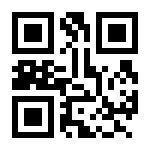
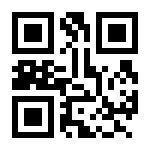
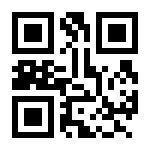
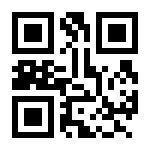
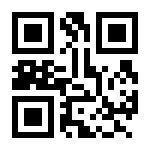
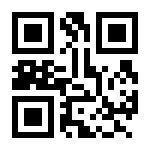
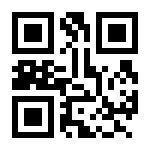
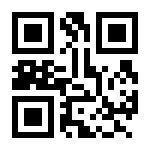
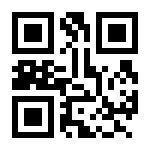
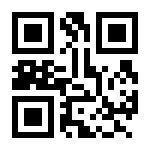
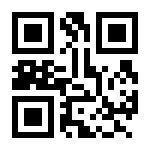
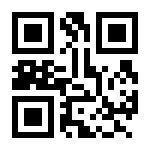
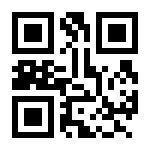
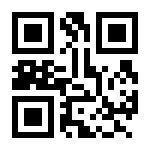
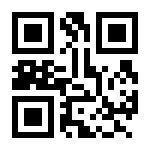
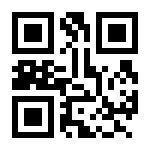
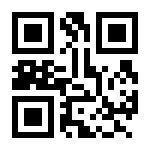
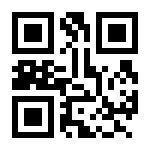
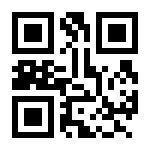
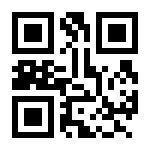
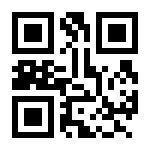
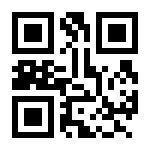
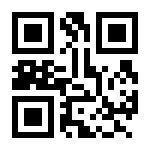
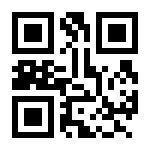
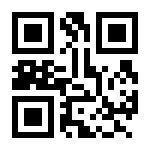
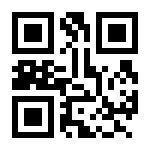
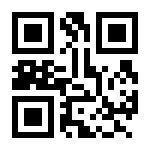
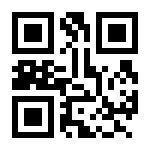
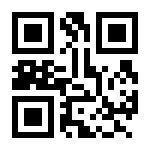
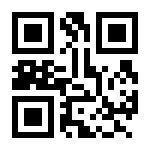
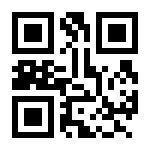
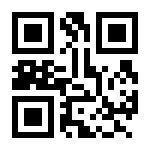
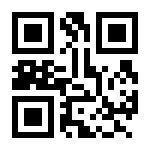
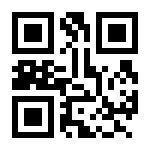
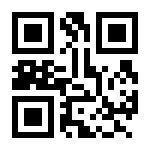
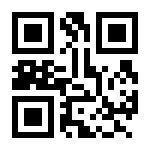
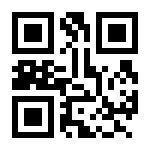
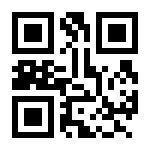
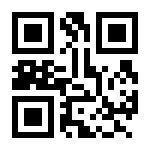
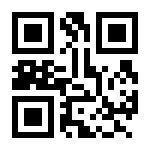
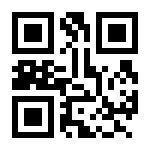
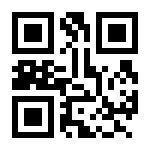
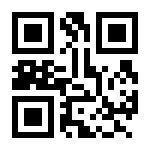
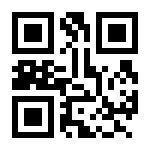
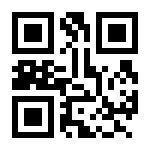
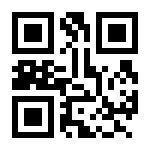
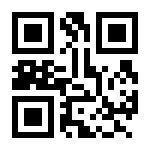
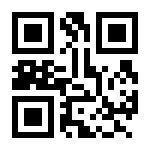
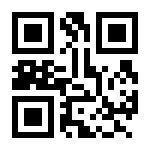
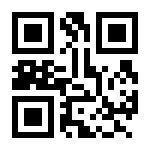
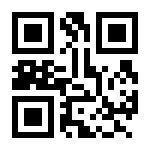
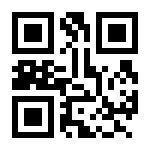
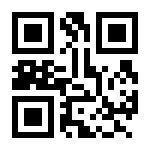

In [20]:
HTML(new_df.to_html(formatters={'QR-Code': image_formatter}, escape=False))

In [21]:
html_obj = new_df.to_html(formatters={'QR-Code': image_formatter}, escape=False)



In [22]:
import os

path = os.path.abspath(file_path+'/temp.html')
url = 'file://' + path

with open(path, 'w') as f:
    f.write(html_obj)

[    Unnamed: 0    Hauptteilnehmer  ... Bildname QR-Code
 0            0   Sisisky Samantha  ...      NaN     NaN
 1            1       Hurwitz Noga  ...      NaN     NaN
 2            2       Gordon Alana  ...      NaN     NaN
 3            3  Ardelean Victoria  ...      NaN     NaN
 4            4       Gruber Sarah  ...      NaN     NaN
 5            5        Myers Louis  ...      NaN     NaN
 6            6         Simens Ben  ...      NaN     NaN
 7            7  Soybelman Michael  ...      NaN     NaN
 8            8   Svetnik Michelle  ...      NaN     NaN
 9            9        Hope Samuel  ...      NaN     NaN
 10          10         Baum Elias  ...      NaN     NaN
 
 [11 rows x 24 columns]]